In [151]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
from matplotlib import pyplot

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline 

In [152]:
data=pd.read_csv("C:/Users/Firas/Documents/2020-2021/machine learning/project/projet_2/traffic2.csv",header=0,sep =',')

In [153]:
print(data.head()) #afficher la data

  jour  2G/3G Total data Traffic Vol TB 4G Total data Traffic Vol TB Total
0  J-1                            425.0                           87   512
1  J-2                            419.0                           86   505
2  J-3                            430.0                           92   522
3  J-4                            431.0                           92   523
4  J-5                            424.0                           93   518


In [154]:
data.shape #on a visualiser notre forme de data

(391, 4)

In [155]:
X=data.iloc[:,0]
Y=data.iloc[:,1]
print(X.shape)
print(Y.shape)

(391,)
(391,)


In [156]:
X.head(4)

0    J-1
1    J-2
2    J-3
3    J-4
Name: jour, dtype: object

In [157]:
Y.head(4)

0    425.0
1    419.0
2    430.0
3    431.0
Name: 2G/3G Total data Traffic Vol TB, dtype: float64

In [158]:
data.set_index('jour',inplace=True)

In [159]:
data.head(4)

,2G/3G Total data Traffic Vol TB,4G Total data Traffic Vol TB,Total
jour,,,
J-1,425.0,87,512
J-2,419.0,86,505
J-3,430.0,92,522
J-4,431.0,92,523


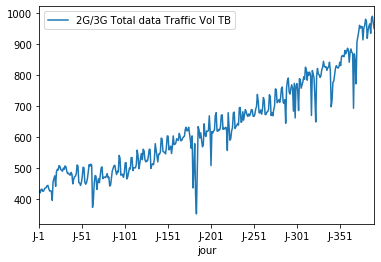

In [160]:
data.plot()

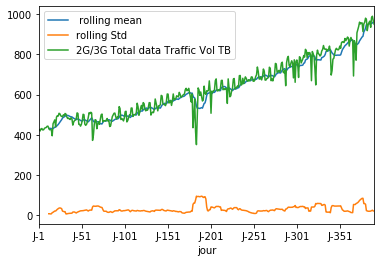

In [161]:
time_series=data['2G/3G Total data Traffic Vol TB']
type(time_series)
time_series.rolling(12).mean().plot(label=' rolling mean')
time_series.rolling(12).std().plot(label='rolling Std')
time_series.plot()
plt.legend()

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose



In [163]:
result = adfuller(df['2G/3G Total data Traffic Vol TB']) #DATA FRAME / DATA ::: adfuller :: methode de test
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.9401967104300284
p-value: 0.9935931089623521
Critical Values:
	1%: -3.4478152097574224
	5%: -2.8692371153451903
	10%: -2.5708704003405356


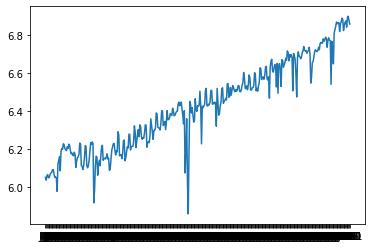

In [164]:
df_log = np.log(df['2G/3G Total data Traffic Vol TB'].astype('float'))
plt.plot(df_log)

In [165]:
from statsmodels.tsa.seasonal import series

In [166]:
decomp = seasonal_decompose(time_series,freq=12)

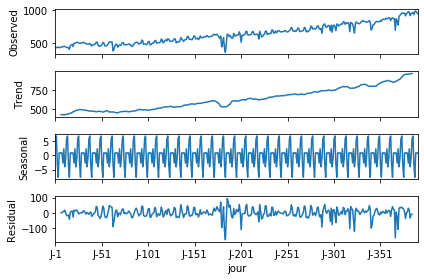

In [167]:
fig =decomp.plot() #afficher

In [194]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)] #train 66% data 
history = [x for x in train]
predictions = list() #list vide

In [195]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0)) #model special pour les time series 
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat) #ajouter #tawa93 
	obs = test[t] 
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=694.562455, expected=687.000000
predicted=688.690260, expected=673.000000
predicted=684.548753, expected=691.000000
predicted=703.993010, expected=727.000000
predicted=714.360911, expected=717.000000
predicted=699.543620, expected=672.000000
predicted=682.607750, expected=672.000000
predicted=688.945385, expected=680.000000
predicted=681.974151, expected=681.000000
predicted=688.455711, expected=688.000000
predicted=698.330323, expected=736.000000
predicted=723.393875, expected=730.000000
predicted=705.960061, expected=669.000000
predicted=675.910314, expected=678.000000
predicted=701.425100, expected=668.000000
predicted=668.487913, expected=687.000000
predicted=699.682035, expected=699.000000
predicted=706.134352, expected=755.000000
predicted=734.532581, expected=752.000000
predicted=724.452571, expected=710.000000
predicted=703.528240, expected=715.000000
predicted=726.005543, expected=720.000000
predicted=712.891722, expected=711.000000
predicted=719.372078, expected=725

Test RMSE: 43.943


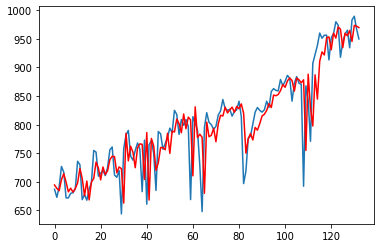

In [196]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [218]:
X = series.values
size = int(len(X))
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [217]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat+10)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))